In a given dataset, we can find groups of features that are correlated among themselves or to a given
feature. From every one of these groups, we can retain the feature that brings most value to the
predictive model and remove the rest.
We can infer the value of the feature by its variability, utilizing pandas std(), by its cardinality,
utilizing pandas nunique() or by the amount of missing data with pandas isnull() followed by
sum().
We could also train a machine learning model utilizing only the features within the correlated group
and obtain the importance assigned to each feature by the model. Then, we would retain the feature
with the highest importance and remove the rest.
We can do all of that automatically with Feature-engine

In [24]:
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from feature_engine.selection import SmartCorrelatedSelection


In [2]:
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.ensemble import RandomForestClassifier

In [3]:
from feature_engine.selection import DropCorrelatedFeatures

In [15]:
data = pd.read_csv('train.csv')
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [16]:
duplicateRows = data[data.duplicated()]
duplicateRows

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
8503,4,76.444563,51.381751,59.356672,35.040763,1.199541,1.291294,121.327600,14.343486,43.823354,...,2.077220,2.213364,2.063611,1.368922,1.203843,1,0.841699,0.433013,0.266940,93.00
12598,2,39.513500,45.227500,37.824826,43.895938,0.650720,0.431701,22.856000,31.184750,11.428000,...,4.750000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,17.00
12736,2,105.962750,121.538200,71.855677,86.707541,0.391159,0.308132,155.754500,99.069800,77.877250,...,5.200000,4.898979,5.101698,0.673012,0.617242,2,2.000000,1.000000,0.979796,2.84
12798,2,141.926690,149.730928,136.457070,144.380165,0.654860,0.588079,78.042380,67.406528,39.021190,...,5.400000,5.477226,5.378269,0.689009,0.686962,1,0.600000,0.500000,0.489898,2.35
12829,2,141.568190,141.568190,132.942020,132.942020,0.632849,0.632849,97.323620,48.661810,48.661810,...,5.500000,5.477226,5.477226,0.689009,0.689009,1,0.500000,0.500000,0.500000,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16734,2,141.568190,131.835828,132.942020,123.748210,0.632849,0.681188,97.323620,20.348172,48.661810,...,5.400000,5.477226,5.378269,0.689009,0.686962,1,0.600000,0.500000,0.489898,1.78
20068,2,114.090000,119.228900,113.831890,119.084493,0.690886,0.417951,15.340000,84.110300,7.670000,...,4.835000,4.472136,4.819254,0.686962,0.398567,1,3.515000,0.500000,0.371181,4.90
20069,2,118.289000,120.024500,118.238064,119.986110,0.692717,0.550104,6.942000,62.615500,3.471000,...,4.500000,3.872983,4.400559,0.661563,0.450561,2,3.000000,1.000000,0.866025,4.10
20071,3,143.662190,147.731162,138.810446,144.499365,1.063590,0.773268,90.546569,81.551291,38.670969,...,5.633634,4.932424,5.604750,1.085189,0.683593,2,3.867868,0.816497,0.546084,2.60


In [17]:
data = data.drop_duplicates()

# Print the updated dataset
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [18]:
data = data.drop(columns=['number_of_elements'])
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [19]:
close_corr =data.corr(method = 'pearson')
close_corr

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
mean_atomic_mass,1.000000,0.815443,0.940210,0.745262,-0.104175,-0.098096,0.125842,0.446325,0.196643,0.130723,...,0.305133,0.392666,0.321934,-0.156998,-0.146226,-0.107039,0.170750,-0.079766,-0.081024,-0.113162
wtd_mean_atomic_mass,0.815443,1.000000,0.847636,0.964012,-0.308124,-0.413358,-0.143792,0.717191,-0.060526,-0.089369,...,0.545974,0.539945,0.549390,-0.375807,-0.331365,-0.038183,0.332698,-0.002807,0.077983,-0.311954
gmean_atomic_mass,0.940210,0.847636,1.000000,0.856449,-0.189982,-0.232456,-0.175801,0.458534,-0.121735,-0.166169,...,0.428030,0.511756,0.450532,-0.306164,-0.308083,-0.164446,0.274154,-0.124097,-0.117175,-0.229885
wtd_gmean_atomic_mass,0.745262,0.964012,0.856449,1.000000,-0.370411,-0.485170,-0.351986,0.673826,-0.274412,-0.331811,...,0.614231,0.608412,0.623435,-0.477714,-0.448308,-0.077587,0.411259,-0.032439,0.030924,-0.369429
entropy_atomic_mass,-0.104175,-0.308124,-0.189982,-0.370411,1.000000,0.889471,0.537854,-0.285161,0.356920,0.412836,...,-0.585717,-0.553177,-0.591685,0.963558,0.861150,0.202634,-0.349133,0.087673,0.018792,0.542854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,-0.107039,-0.038183,-0.164446,-0.077587,0.202634,0.160734,0.208458,0.023641,0.192080,0.177327,...,0.113189,-0.039978,0.034796,0.154607,0.203963,1.000000,0.114614,0.973837,0.867507,-0.144641
wtd_range_Valence,0.170750,0.332698,0.274154,0.411259,-0.349133,-0.546303,-0.363967,0.595038,-0.271879,-0.389699,...,0.684399,0.533512,0.682172,-0.416558,-0.639381,0.114614,1.000000,0.184713,0.132202,-0.439821
std_Valence,-0.079766,-0.002807,-0.124097,-0.032439,0.087673,0.056051,0.134726,0.067124,0.144277,0.123676,...,0.187765,0.035886,0.109815,0.034199,0.089699,0.973837,0.184713,1.000000,0.885844,-0.208882
wtd_std_Valence,-0.081024,0.077983,-0.117175,0.030924,0.018792,-0.006994,0.102883,0.093093,0.122862,0.156034,...,0.259755,0.089327,0.169942,-0.017114,0.081537,0.867507,0.132202,0.885844,1.000000,-0.300651


In [20]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]



X.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [21]:
y.head()

0    29.0
1    26.0
2    19.0
3    22.0
4    23.0
Name: critical_temp, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

X_train.shape, X_test.shape

((14835, 80), (6358, 80))

## Remove correlated: Feature-engine
#### Smart approach
###### _From each group of correlated variables, we retain the one with the highest importance, derived from a machine learning model._

In [25]:
# To remove correlated features
sel = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.8,
    selection_method='model_performance',
    estimator=RandomForestRegressor(n_estimators=5, random_state=10),
    scoring='roc_auc',
    cv=3,
)

# fit finds the correlated features
sel.fit(X_train, y_train)  

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for the

SmartCorrelatedSelection(estimator=RandomForestRegressor(n_estimators=5,
                                                         random_state=10),
                         selection_method='model_performance')

In [26]:
sel.features_to_drop_

['mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'std_atomic_mass',
 'wtd_std_atomic_mass',
 'wtd_mean_fie',
 'gmean_fie',
 'entropy_fie',
 'range_fie',
 'std_fie',
 'wtd_std_fie',
 'mean_atomic_radius',
 'wtd_mean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'gmean_Density',
 'entropy_Density',
 'range_Density',
 'wtd_range_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_mean_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'range_ElectronAffinity',
 'wtd_std_ElectronAffinity',
 'mean_FusionHeat',
 'gmean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'entropy_FusionHeat',
 'wtd_entropy_FusionHeat',
 'std_FusionHeat',
 'wtd_std_FusionHeat',
 'wtd_mean_ThermalConductivity',
 'gmean_ThermalConductivity',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'wtd_mean_Valen

In [27]:
sel.correlated_feature_sets_

[{'gmean_atomic_mass', 'mean_atomic_mass', 'wtd_mean_atomic_mass'},
 {'wtd_gmean_Density', 'wtd_gmean_atomic_mass', 'wtd_mean_Density'},
 {'entropy_Density',
  'entropy_ElectronAffinity',
  'entropy_FusionHeat',
  'entropy_Valence',
  'entropy_atomic_mass',
  'entropy_atomic_radius',
  'entropy_fie',
  'wtd_entropy_FusionHeat',
  'wtd_entropy_Valence',
  'wtd_entropy_atomic_mass',
  'wtd_entropy_atomic_radius'},
 {'range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass'},
 {'wtd_range_Density', 'wtd_range_atomic_mass'},
 {'gmean_fie', 'mean_fie'},
 {'wtd_gmean_atomic_radius',
  'wtd_gmean_fie',
  'wtd_mean_atomic_radius',
  'wtd_mean_fie',
  'wtd_std_fie'},
 {'wtd_entropy_ElectronAffinity', 'wtd_entropy_fie'},
 {'gmean_Density',
  'range_atomic_radius',
  'range_fie',
  'std_atomic_radius',
  'std_fie',
  'wtd_std_atomic_radius'},
 {'gmean_atomic_radius', 'mean_atomic_radius'},
 {'range_Density', 'std_Density', 'wtd_std_Density'},
 {'gmean_ElectronAffinity', 'mean_ElectronAffinity

In [28]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((14835, 31), (6358, 31))

In [29]:
X_train_t.head()

,gmean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,gmean_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,...,wtd_range_FusionHeat,mean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_range_Valence,std_Valence
20297,25.191406,149.35206,37.489206,973.960000,844.702743,1.584098,105.420000,101.490339,190,54.200000,...,6.891700,28.441416,7.361496,0.922841,0.917574,78.97342,19.746013,2.800000,1.150000,1.326650
9059,72.746865,184.59060,26.283367,891.650000,931.907696,1.015508,566.411753,131.729022,205,44.945219,...,1.880590,106.581645,0.912212,0.270718,0.374696,399.97342,49.787454,2.000000,0.754980,0.000000
7212,68.911502,124.90825,11.265538,738.983333,944.028637,0.976254,691.250769,157.328220,199,29.307692,...,2.601231,100.671097,1.175383,0.959607,0.446175,399.97342,83.062611,3.166667,0.953846,1.462494
17979,40.300849,121.32760,22.550567,966.000000,954.312690,1.293442,495.532727,107.487053,211,40.654545,...,2.348727,123.610856,1.131007,0.750570,0.635401,399.97342,72.723747,1.800000,0.709091,0.400000
13928,47.486267,83.94930,41.731530,811.366667,849.472926,0.740997,525.730000,136.091562,131,89.300000,...,51.600000,111.000000,89.027960,1.023977,0.712945,86.00000,66.525000,5.000000,2.225000,0.816497



# Mutual information

In [31]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [34]:
mi = mutual_info_regression(X_train, y_train)

In [35]:
mi

array([0.69432142, 0.58382461, 0.75776547, 0.63890272, 0.87717053,
       0.63016348, 0.77068715, 0.51070842, 0.73375752, 0.57073721,
       0.70139967, 0.68554658, 0.66639289, 0.6130655 , 0.779579  ,
       0.52481227, 0.8763946 , 0.54749069, 0.89942641, 0.73517477,
       0.63845049, 0.66115229, 0.71657635, 0.74774383, 0.8679685 ,
       0.60602286, 0.79581156, 0.45076605, 0.79452992, 0.68351464,
       0.73893296, 0.615566  , 0.8920313 , 0.79941472, 0.83752477,
       0.46834788, 0.84375766, 0.56021054, 0.73395185, 0.61686371,
       0.76610671, 0.60488371, 0.78355578, 0.56192199, 0.82818808,
       0.43984964, 0.86465662, 0.64405046, 0.82715706, 0.67429743,
       0.77989297, 0.73920531, 0.80274555, 0.77830641, 0.83856345,
       0.56299305, 0.76625861, 0.68253585, 0.72696916, 0.69855797,
       0.82277274, 0.6239187 , 0.79153052, 0.69511968, 0.7089897 ,
       0.44801647, 0.72920218, 0.66906929, 0.86776166, 0.77086029,
       0.57933643, 0.85070225, 0.75046519, 0.84355055, 0.80942

Text(0.5, 1.0, 'Mutual information between predictors and target')

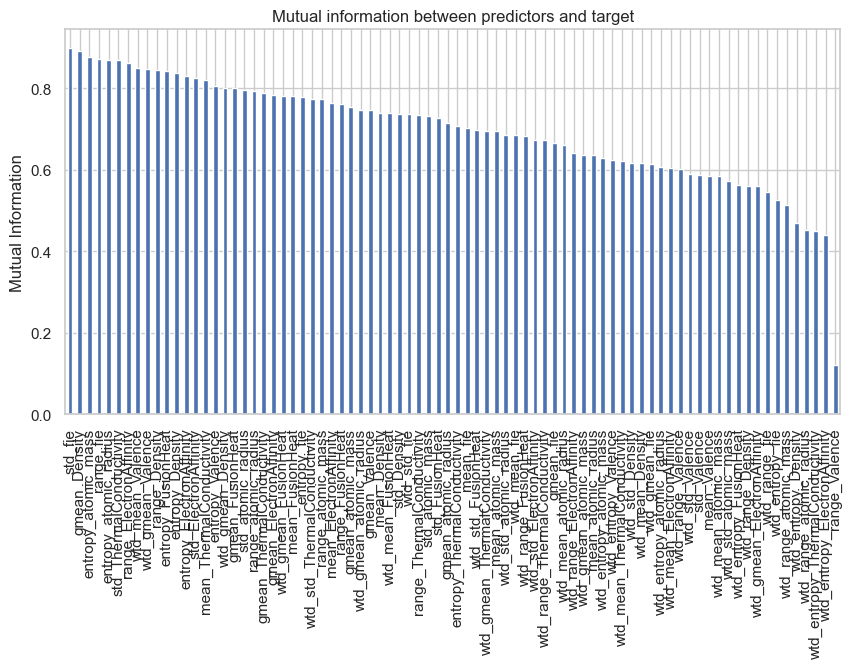

In [44]:
# determine the mutual information

mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [46]:
sel = SelectPercentile(mutual_info_regression,
                       percentile=60).fit(X_train, y_train)

# display the features
X_train.columns[sel.get_support()]

Index(['mean_atomic_mass', 'gmean_atomic_mass', 'entropy_atomic_mass',
       'range_atomic_mass', 'std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'entropy_fie', 'range_fie', 'std_fie', 'wtd_std_fie',
       'gmean_atomic_radius', 'wtd_gmean_atomic_radius',
       'entropy_atomic_radius', 'range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'range_Density', 'std_Density',
       'mean_ElectronAffinity', 'gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'range_ElectronAffinity',
       'std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat',
       'gmean_FusionHeat', 'wtd_gmean_FusionHeat', 'entropy_FusionHeat',
       'range_FusionHeat', 'wtd_range_FusionHeat', 'std_FusionHeat',
       'wtd_std_FusionHeat', 'mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'range_ThermalCond

In [47]:
X_train_m = sel.transform(X_train)
X_test_m = sel.transform(X_test)

In [48]:
X_train_m = pd.DataFrame(X_train, columns=sel.get_feature_names_out())
X_test_m = pd.DataFrame(X_test, columns=sel.get_feature_names_out())

X_train_m.head()

,mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,std_atomic_mass,mean_fie,wtd_mean_fie,entropy_fie,range_fie,std_fie,...,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence
20297,59.626788,25.191406,1.182249,149.35206,52.574266,973.960000,889.445000,1.558655,773.0,304.625722,...,3.008254,7.361496,0.922841,78.97342,31.194431,31.075525,3.150000,2.459509,2.873807,1.494403
9059,104.365600,72.746865,1.129463,184.59060,70.392496,891.650000,1002.293227,1.328085,810.6,301.512840,...,6.313081,0.912212,0.270718,399.97342,169.524558,130.185295,2.000000,2.000000,2.000000,1.386294
7212,82.156483,68.911502,1.667846,124.90825,37.507222,738.983333,1006.655385,1.734348,786.5,267.412032,...,15.008882,1.175383,0.959607,399.97342,141.536793,158.931255,2.200000,2.884499,2.135159,1.694415
17979,55.189761,40.300849,1.314997,121.32760,44.475649,966.000000,1043.332727,1.501853,1177.5,455.142883,...,4.027907,1.131007,0.750570,399.97342,157.433022,154.638964,1.872727,1.741101,1.831121,1.581094
13928,66.959027,47.486267,0.877973,83.94930,38.874328,811.366667,875.180000,1.071221,422.1,194.175940,...,101.666732,89.027960,1.023977,86.00000,40.307154,42.922714,4.525000,4.932424,4.492567,1.085189
